#  1주차

In [44]:
#필요한 라이브러리 불러오기
# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm
import statsmodels.formula.api as smf


# 변수 설명
- Date : 날짜
- Rented Bike Count : 대여수
- Hour : 시간
- Temperature(°C) : 온도
- Humidity(%) : 습도
- Wind speed (m/s) : 풍속
- Visibility (10m) : 가시성
- Dew point temperature(°C) : 이슬점온도
- Solar Radiation (MJ/m2) : 태양복사
- Rainfall(mm) : 강우량
- Snowfall (cm) : 강설량
- Seasons : 계절
- Holiday : 휴일
- Functioning DAy : 대여가능일

#  가설
1.날씨가 좋은 봄 가을에 따릉이 이용량이 많을 것 같다

2.출퇴근 시간대에 이용량이 많을 것 같다

In [45]:
#train 데이터 불러오기
train = pd.read_csv("C:/Users/user/OneDrive/바탕 화면/비어플/train.csv",encoding='EUC-KR')
df = train
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,24/10/2018,1492,16,NaN,42,1.3,1976,5.0,1.22,0.0,0.0,NaN,No Holiday,Yes
1,01/05/2018,1536,14,23.0,64,2.8,520,15.8,1.59,0.0,0.0,Spring,Holiday,Yes
2,14/11/2018,327,2,6.2,59,0.6,1584,-1.2,0.00,0.0,0.0,Autumn,No Holiday,Yes
3,31/08/2018,170,4,23.2,83,1.6,1102,20.1,0.00,0.0,0.0,Summer,No Holiday,Yes
4,26/06/2018,45,5,23.7,64,0.9,876,16.4,0.00,0.1,0.0,Summer,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,08/02/2018,255,7,-9.6,67,1.0,1503,-14.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7004,28/03/2018,104,4,10.6,77,0.9,422,6.7,0.00,0.0,0.0,Spring,No Holiday,Yes
7005,30/04/2018,569,0,14.7,54,1.3,718,5.4,0.00,0.0,0.0,Spring,No Holiday,Yes
7006,29/05/2018,2234,8,20.5,66,1.7,1062,13.9,0.34,0.0,0.0,Spring,No Holiday,Yes


#  1.데이터 살펴보기

In [46]:
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,24/10/2018,1492,16,NaN,42,1.3,1976,5.0,1.22,0.0,0.0,NaN,No Holiday,Yes
1,01/05/2018,1536,14,23.0,64,2.8,520,15.8,1.59,0.0,0.0,Spring,Holiday,Yes
2,14/11/2018,327,2,6.2,59,0.6,1584,-1.2,0.00,0.0,0.0,Autumn,No Holiday,Yes
3,31/08/2018,170,4,23.2,83,1.6,1102,20.1,0.00,0.0,0.0,Summer,No Holiday,Yes
4,26/06/2018,45,5,23.7,64,0.9,876,16.4,0.00,0.1,0.0,Summer,No Holiday,Yes


In [47]:
df.tail(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
7003,08/02/2018,255,7,-9.6,67,1.0,1503,-14.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7004,28/03/2018,104,4,10.6,77,0.9,422,6.7,0.00,0.0,0.0,Spring,No Holiday,Yes
7005,30/04/2018,569,0,14.7,54,1.3,718,5.4,0.00,0.0,0.0,Spring,No Holiday,Yes
7006,29/05/2018,2234,8,20.5,66,1.7,1062,13.9,0.34,0.0,0.0,Spring,No Holiday,Yes
7007,20/09/2018,1290,17,19.3,76,2.1,2000,14.9,0.21,0.0,0.0,NaN,No Holiday,Yes


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008 entries, 0 to 7007
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       7008 non-null   object 
 1   Rented Bike Count          7008 non-null   int64  
 2   Hour                       7008 non-null   int64  
 3   Temperature(°C)            6306 non-null   float64
 4   Humidity(%)                7008 non-null   int64  
 5   Wind speed (m/s)           6303 non-null   float64
 6   Visibility (10m)           7008 non-null   int64  
 7   Dew point temperature(°C)  7008 non-null   float64
 8   Solar Radiation (MJ/m2)    7008 non-null   float64
 9   Rainfall(mm)               7008 non-null   float64
 10  Snowfall (cm)              7008 non-null   float64
 11  Seasons                    6309 non-null   object 
 12  Holiday                    7008 non-null   object 
 13  Functioning Day            7008 non-null   objec

In [49]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,7008.000000,7008.000000,6306.000000,7008.000000,6303.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000
mean,708.597603,11.559646,13.030082,58.141981,1.732937,1440.761558,4.042066,0.574576,0.150271,0.075300
std,647.980391,6.923619,11.986773,20.423404,1.030763,607.545441,13.121249,0.874529,1.134598,0.440936
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,6.000000,3.600000,42.000000,1.000000,946.000000,-4.800000,0.000000,0.000000,0.000000
50%,505.500000,12.000000,14.000000,57.000000,1.500000,1703.000000,5.100000,0.010000,0.000000,0.000000
75%,1071.000000,18.000000,22.675000,74.000000,2.350000,2000.000000,14.900000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


결측치 확인 및 어떻게 대체할지 확인

In [50]:
df.isna().sum()
#Temperature, Wind speed, Seasons에만 Nan값 존재 

Date                           0
Rented Bike Count              0
Hour                           0
Temperature(°C)              702
Humidity(%)                    0
Wind speed (m/s)             705
Visibility (10m)               0
Dew point temperature(°C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                      699
Holiday                        0
Functioning Day                0
dtype: int64

In [51]:
#Datetime 형식으로 변환
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21944\3131804023.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [52]:
#월별로 계절 확인
print(df[df['Seasons'] == 'Winter']['Date'].dt.month.unique(),
      df[df['Seasons'] == 'Spring']['Date'].dt.month.unique(),
      df[df['Seasons'] == 'Summer']['Date'].dt.month.unique(),
      df[df['Seasons'] == 'Autumn']['Date'].dt.month.unique())
#겨울은 12 1 2 / 봄은 3 4 5 / 여름은 6 7 8 / 가을은 9 10 11 으로 분류되어있음

[ 2  1 12] [5 3 4] [8 6 7] [11  9 10]


In [53]:
#계절 결측치를 월에 맞춰서 결측치 대체
df.loc[df['Date'].dt.month.isin([12, 1, 2]), 'Seasons'] = 'Winter'
df.loc[df['Date'].dt.month.isin([3, 4, 5]), 'Seasons'] = 'Spring'
df.loc[df['Date'].dt.month.isin([6, 7, 8]), 'Seasons'] = 'Summer'
df.loc[df['Date'].dt.month.isin([9, 10,11]), 'Seasons'] = 'Autumn'


In [54]:
#온도 결측치 확인
df[df['Temperature(°C)'].isna()]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2018-10-24,1492,16,NaN,42,1.3,1976,5.0,1.22,0.0,0.0,Autumn,No Holiday,Yes
6,2018-07-04,941,11,NaN,60,2.3,1861,21.3,2.61,0.0,0.0,Summer,No Holiday,Yes
11,2018-05-24,1390,7,NaN,61,1.3,1818,5.1,0.42,0.0,0.0,Spring,No Holiday,Yes
18,2018-04-10,133,21,NaN,70,7.3,1634,11.9,0.00,0.5,0.0,Spring,No Holiday,Yes
19,2018-11-10,754,0,NaN,77,0.9,433,7.4,0.00,0.0,0.0,Autumn,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6978,2018-02-27,72,5,NaN,50,0.1,1026,-8.6,0.00,0.0,0.0,Winter,No Holiday,Yes
6979,2018-02-23,42,0,NaN,86,2.7,54,-0.3,0.00,0.4,0.4,Winter,No Holiday,Yes
6983,2018-11-28,1540,8,NaN,29,1.1,1337,-14.1,0.02,0.0,0.0,Autumn,No Holiday,Yes
6999,2018-11-15,1416,17,NaN,38,1.4,884,-0.3,0.29,0.0,0.0,Autumn,No Holiday,Yes


In [55]:
#데이터를 시간순으로 배열
df = df.sort_values(by=['Date', 'Hour'], ascending=[True, True]).reset_index()
df = df.drop(df.columns[0], axis=1)
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,NaN,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,2018-11-30,1047,17,6.0,29,2.1,1877,-10.7,0.23,0.0,0.0,Autumn,No Holiday,Yes
7004,2018-11-30,1384,18,4.7,34,1.9,1661,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes
7005,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.00,0.0,0.0,Autumn,No Holiday,Yes
7006,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes


In [56]:
#'Temperature(°C)'결측치를 선형보간법으로 채우기
df['Temperature(°C)'] = df['Temperature(°C)'].interpolate(method='linear')

In [57]:
#'Wind speed (m/s)'결측치를 선형보간법으로 채우기
df['Wind speed (m/s)'] = df['Wind speed (m/s)'].interpolate(method='linear')

In [58]:
#결측치가 사라졌나 확인
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [59]:
df.describe()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,7008,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000
mean,2018-06-01 04:16:38.630137088,708.597603,11.559646,12.881856,58.141981,1.724144,1440.761558,4.042066,0.574576,0.150271,0.075300
min,2017-12-01 00:00:00,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,2018-03-01 00:00:00,191.000000,6.000000,3.500000,42.000000,1.000000,946.000000,-4.800000,0.000000,0.000000,0.000000
50%,2018-06-02 00:00:00,505.500000,12.000000,13.700000,57.000000,1.500000,1703.000000,5.100000,0.010000,0.000000,0.000000
75%,2018-09-01 00:00:00,1071.000000,18.000000,22.600000,74.000000,2.300000,2000.000000,14.900000,0.930000,0.000000,0.000000
max,2018-11-30 00:00:00,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000
std,NaN,647.980391,6.923619,12.009894,20.423404,1.022494,607.545441,13.121249,0.874529,1.134598,0.440936


Text(0.5, 1.0, 'correlation heatmap')

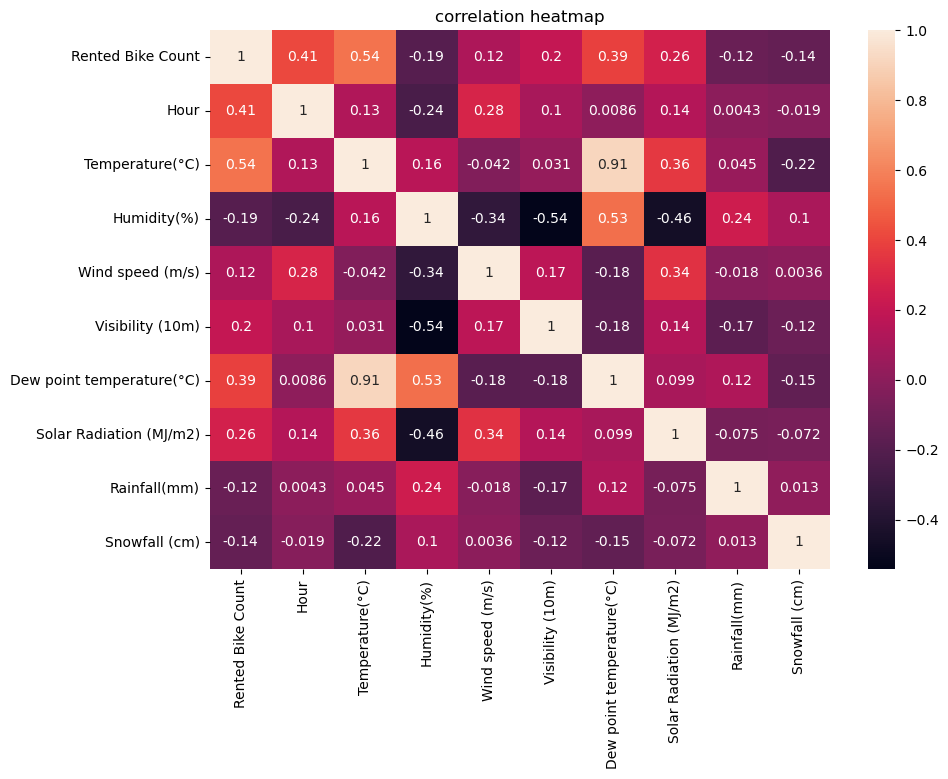

In [60]:
df_num = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,7))
sns.heatmap(df_num.corr(),annot = True)
plt.title('correlation heatmap')

In [61]:
#온도와 이슬점온도는 correlation값이 0.913359로 매우 큼
df_num.corr()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.412000,0.542820,-0.194577,0.119555,0.199378,0.386236,0.262888,-0.124764,-0.140378
Hour,0.412000,1.000000,0.129173,-0.241683,0.279606,0.101271,0.008633,0.142704,0.004299,-0.019116
Temperature(°C),0.542820,0.129173,1.000000,0.158624,-0.041681,0.031487,0.913359,0.357569,0.045495,-0.217517
Humidity(%),-0.194577,-0.241683,0.158624,1.000000,-0.342796,-0.542005,0.534907,-0.461830,0.237836,0.103439
Wind speed (m/s),0.119555,0.279606,-0.041681,-0.342796,1.000000,0.171540,-0.183576,0.335549,-0.017614,0.003631
Visibility (10m),0.199378,0.101271,0.031487,-0.542005,0.171540,1.000000,-0.178756,0.144465,-0.172910,-0.117725
Dew point temperature(°C),0.386236,0.008633,0.913359,0.534907,-0.183576,-0.178756,1.000000,0.099315,0.121872,-0.151745
Solar Radiation (MJ/m2),0.262888,0.142704,0.357569,-0.461830,0.335549,0.144465,0.099315,1.000000,-0.074714,-0.071934
Rainfall(mm),-0.124764,0.004299,0.045495,0.237836,-0.017614,-0.172910,0.121872,-0.074714,1.000000,0.013482
Snowfall (cm),-0.140378,-0.019116,-0.217517,0.103439,0.003631,-0.117725,-0.151745,-0.071934,0.013482,1.000000


<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

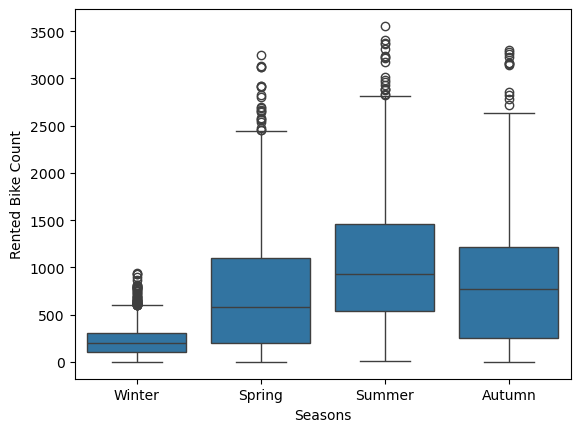

In [62]:
## 따릉이 대여수가 여름-가을-봄-겨울 순으로 높은것을 확인
sns.boxplot(x='Seasons',y='Rented Bike Count',data=df)

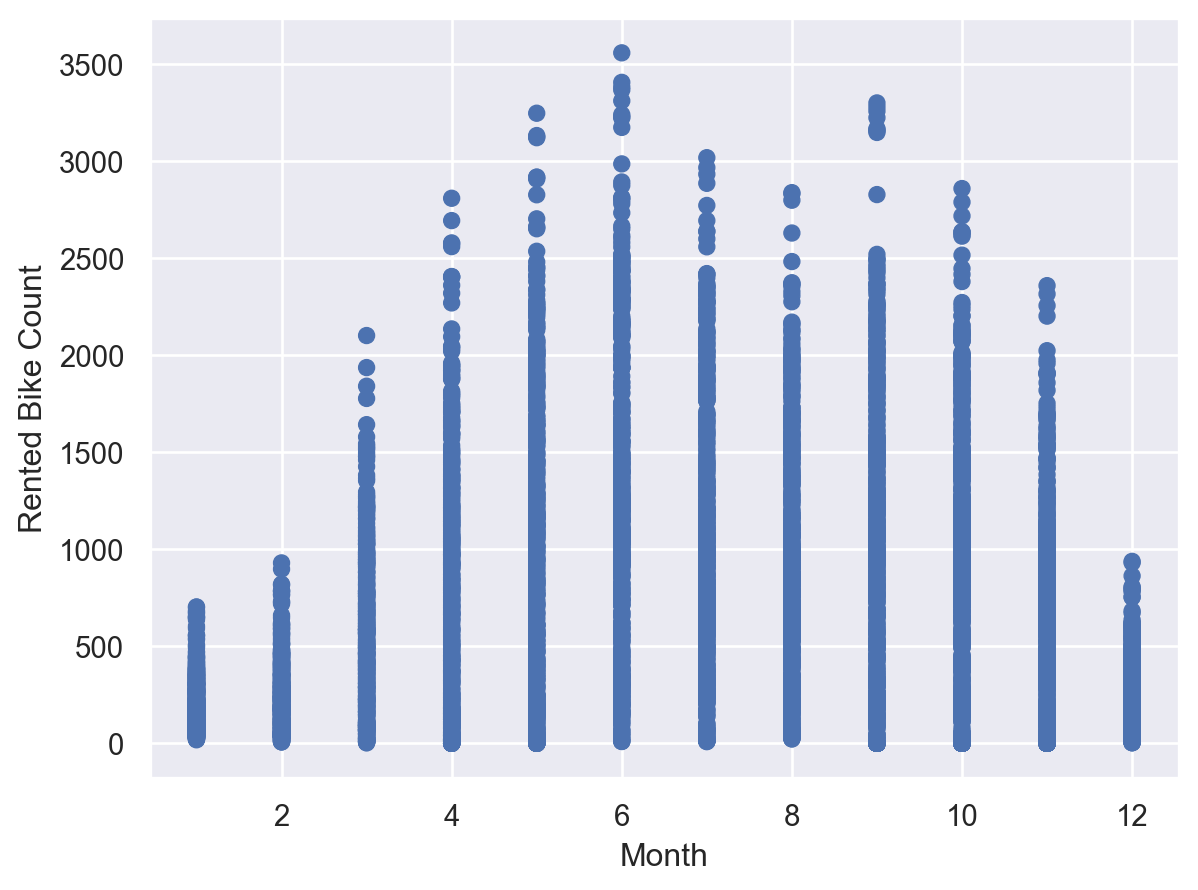

In [63]:
#월별로 대여량 확인
#6월이 가장 많고 1월이 가장 적음
df['Month'] = df['Date'].dt.month 
(
    so.Plot(df,x='Month',y='Rented Bike Count')
    .add(so.Dot())
)


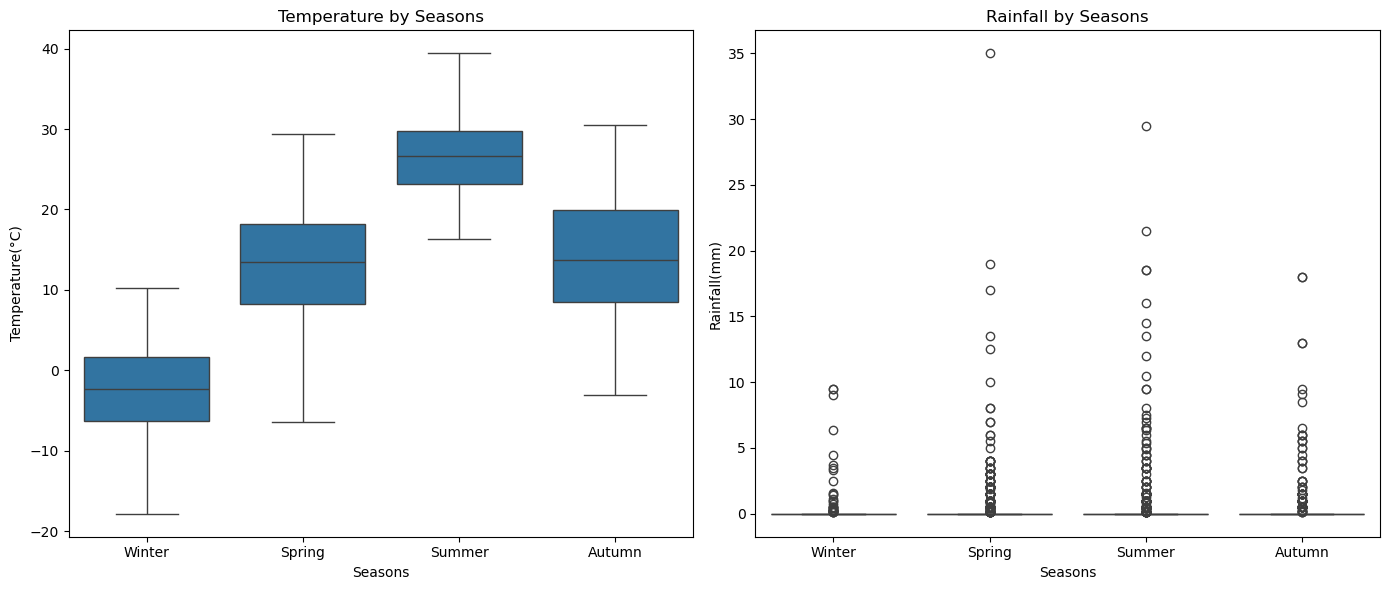

In [64]:
# 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 계절별 온도 박스 플롯
sns.boxplot(x='Seasons', y='Temperature(°C)', data=df, ax=axes[0])
axes[0].set_title('Temperature by Seasons')

# 계절별 강수량 박스 플롯
sns.boxplot(x='Seasons',y ='Rainfall(mm)', data=df, ax=axes[1])
axes[1].set_title('Rainfall by Seasons')

# 그래프 표시
plt.tight_layout()
plt.show()


#여름이 온도와 강수량이 평균적으로 제일 높은 것으로 확인

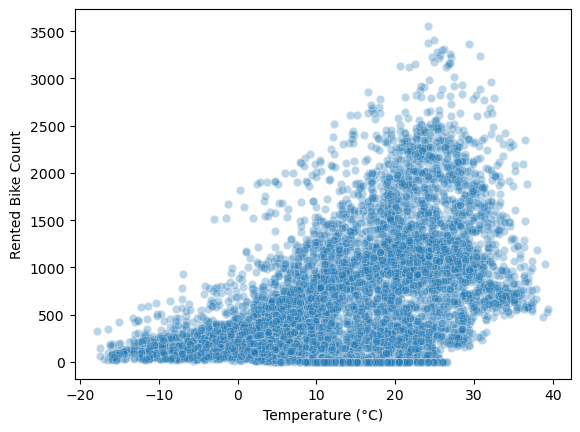

In [65]:
#온도별 대여량 확인
sns.scatterplot(x='Temperature(°C)', y='Rented Bike Count', data=df, alpha=0.3)
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.show()

<Axes: xlabel='Seasons', ylabel='Solar Radiation (MJ/m2)'>

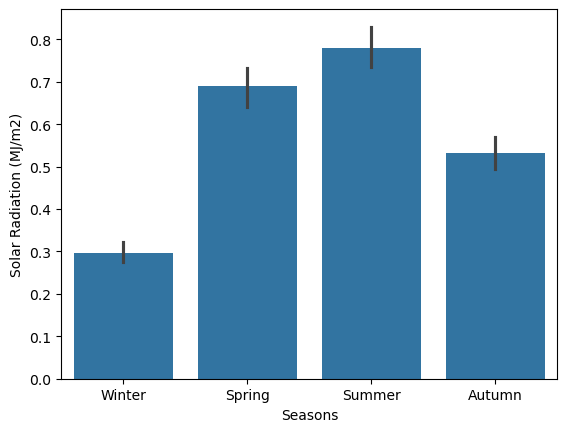

In [66]:
#계절별 태양복사량 평균 확인
#여름-봄-가을-겨울 순
sns.barplot(x='Seasons',y='Solar Radiation (MJ/m2)',data=df,estimator='mean')

<Axes: xlabel='Seasons', ylabel='Dew point temperature(°C)'>

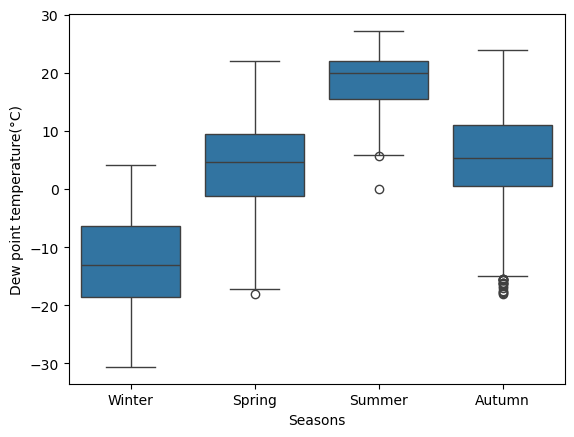

In [67]:
#계절별 이슬점 온도 확인
#여름-가을-봄-겨울 순
sns.boxplot(x='Seasons',y='Dew point temperature(°C)',data=df)

<Axes: xlabel='Seasons', ylabel='count'>

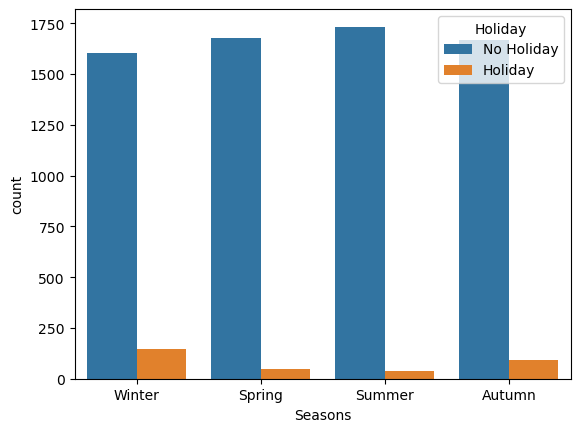

In [68]:
#계절별 휴일 확인
#겨울-가을-봄-여름 순
sns.countplot(x='Seasons',hue='Holiday',data= df)

<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

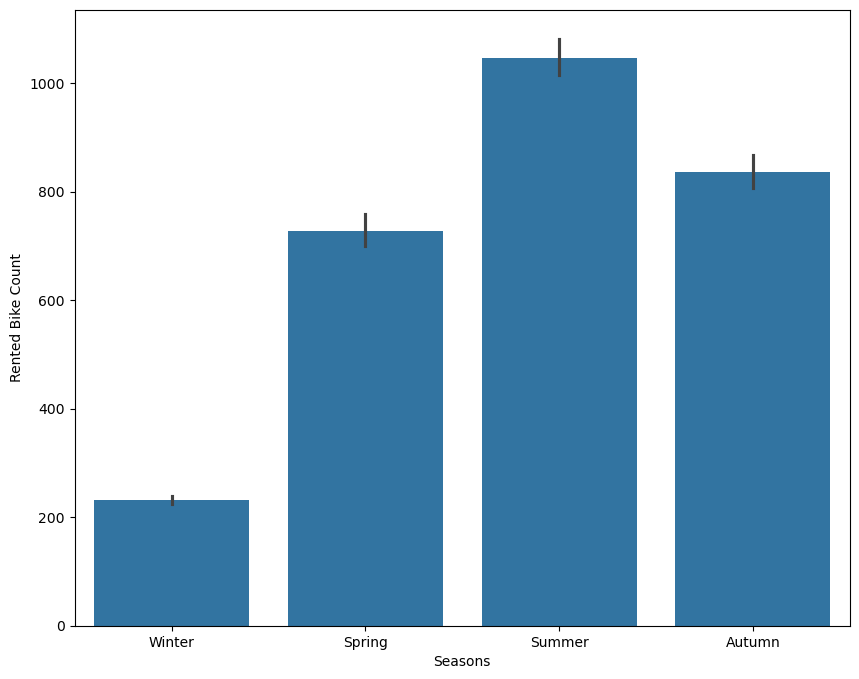

In [69]:
#공휴일이 아닌날의 계절별 대여 평균
plt.figure(figsize=(10, 8))#사이즈 조정
sns.barplot(x='Seasons', y='Rented Bike Count', data=df[df['Holiday']=='No Holiday'], estimator='mean')

<Axes: xlabel='Seasons', ylabel='count'>

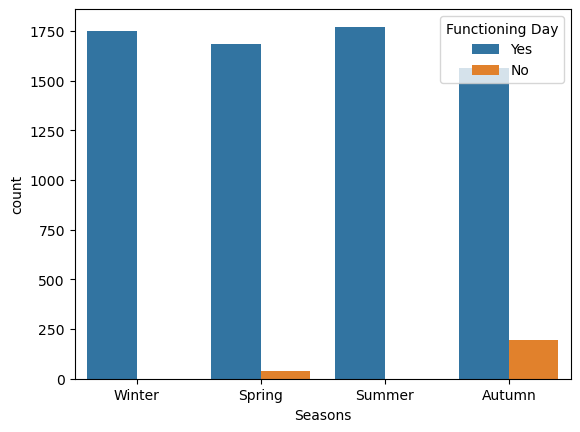

In [70]:
sns.countplot(x='Seasons',hue='Functioning Day',data= df)
#봄 가을에는 대여 불가능한 날이 있는 것으로 보임

In [71]:
df[df['Functioning Day']=='No']['Rented Bike Count'].value_counts()
#Functiong Day가 No인날은 Rented Bike가 전부 0으로 측정된 것을 확인

Rented Bike Count
0    236
Name: count, dtype: int64

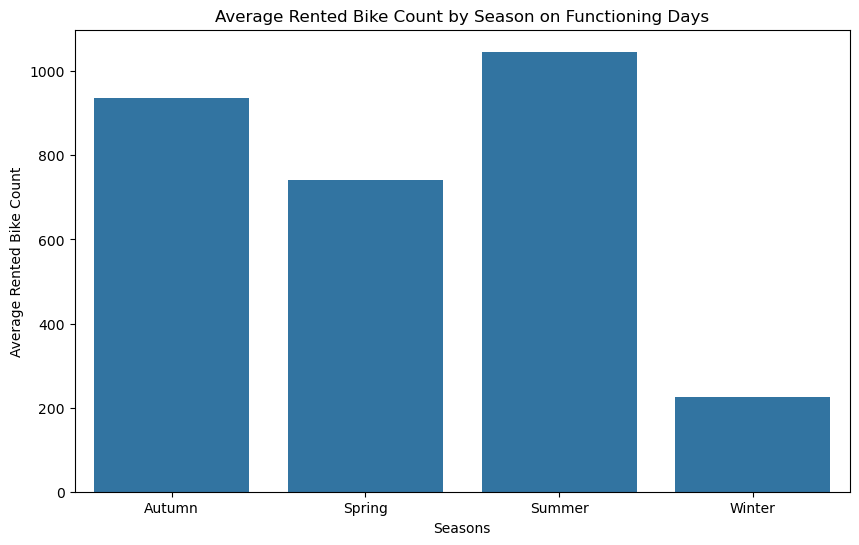

In [72]:
#Functioning Day가 Yes인날의 계절별 대여량 평균 확인
#Functioning Day가 Yes인 날만 확인해봐도 대여량의 평균은 여름이 젤 높다
functioning_df = df[df['Functioning Day']== 'Yes']
rent_mean = functioning_df.groupby('Seasons')['Rented Bike Count'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Seasons', y='Rented Bike Count', data=rent_mean)
plt.title('Average Rented Bike Count by Season on Functioning Days')
plt.xlabel('Seasons')
plt.ylabel('Average Rented Bike Count')
plt.show()

여름은 기온이 높고 강수량이 많음에도 불구하고, 방학 등 추가적인 요인이 대여량에 큰 영향을 준 것으로 보임

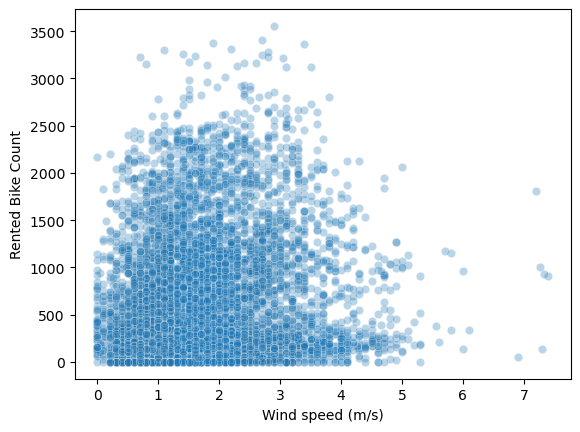

In [73]:
#풍속 대여량 확인
sns.scatterplot(x='Wind speed (m/s)', y='Rented Bike Count', data=df, alpha=0.3)
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Rented Bike Count')
plt.show()

<Axes: xlabel='Seasons', ylabel='Wind speed (m/s)'>

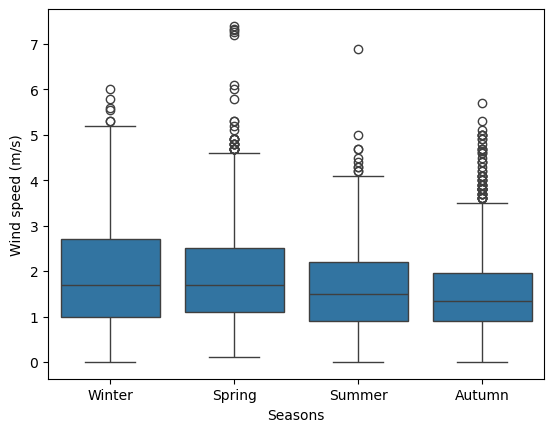

In [74]:
#계절별 풍속 확인
sns.boxplot(x='Seasons',y='Wind speed (m/s)',data=df)

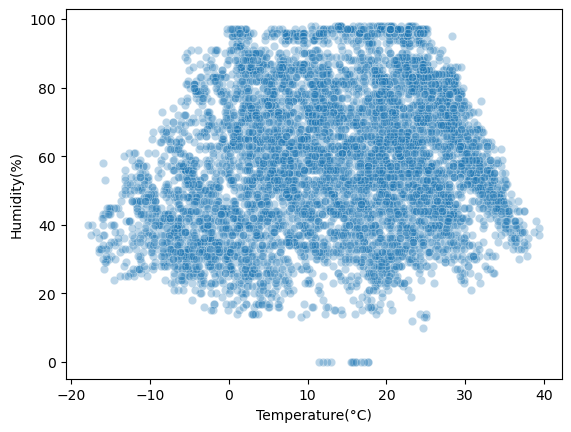

In [75]:
#온도와 습도의 관계
sns.scatterplot(x='Temperature(°C)', y='Humidity(%)', data=df, alpha=0.3)
plt.xlabel('Temperature(°C)')
plt.ylabel('Humidity(%)')
plt.show()

<Axes: xlabel='Seasons', ylabel='Snowfall (cm)'>

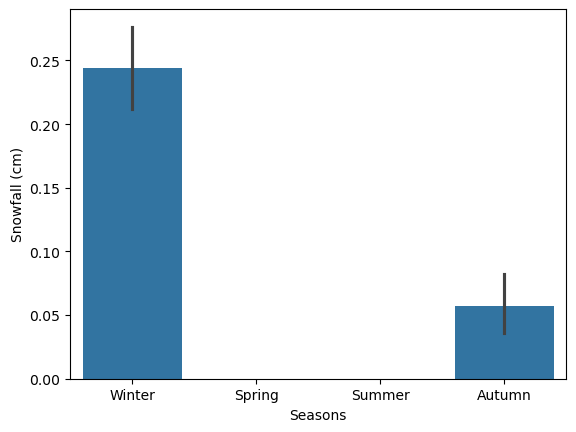

In [76]:
#계절별 강설량 확인
#당연히 겨울에 많이옴/ 가을에도 조금 온것으로 보임
sns.barplot(x='Seasons',y='Snowfall (cm)',data=df)


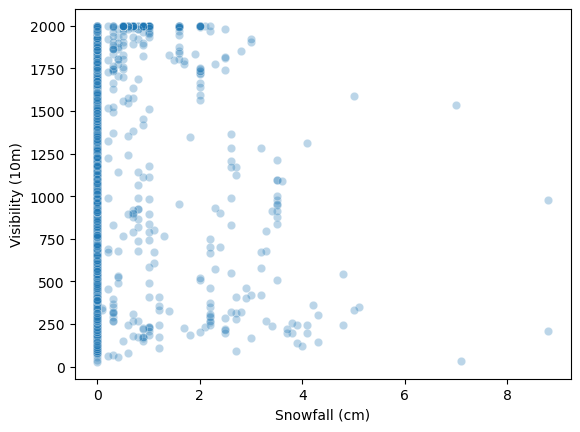

In [77]:

sns.scatterplot(x='Snowfall (cm)', y='Visibility (10m)', data=df, alpha=0.3)
plt.xlabel('Snowfall (cm)')
plt.ylabel('Visibility (10m)')
plt.show()

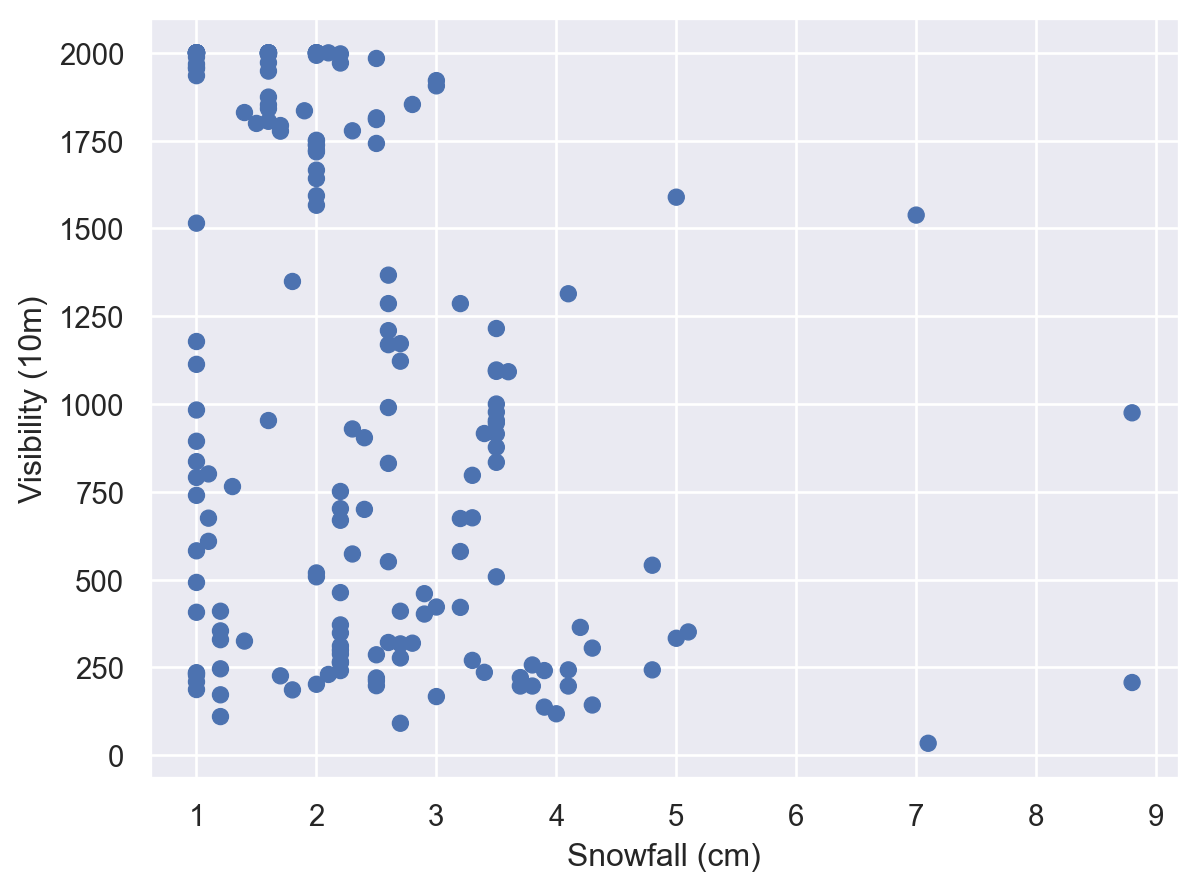

In [78]:
#눈 안온날이 많으므로 1cm 이상 온 날만 확인
#강설량하고 가시성의 관계는 적은 것 같다
df_snow = df[df['Snowfall (cm)'] >=1]
(
    so.Plot(df_snow,x='Snowfall (cm)',y='Visibility (10m)')
    .add(so.Dot())
)


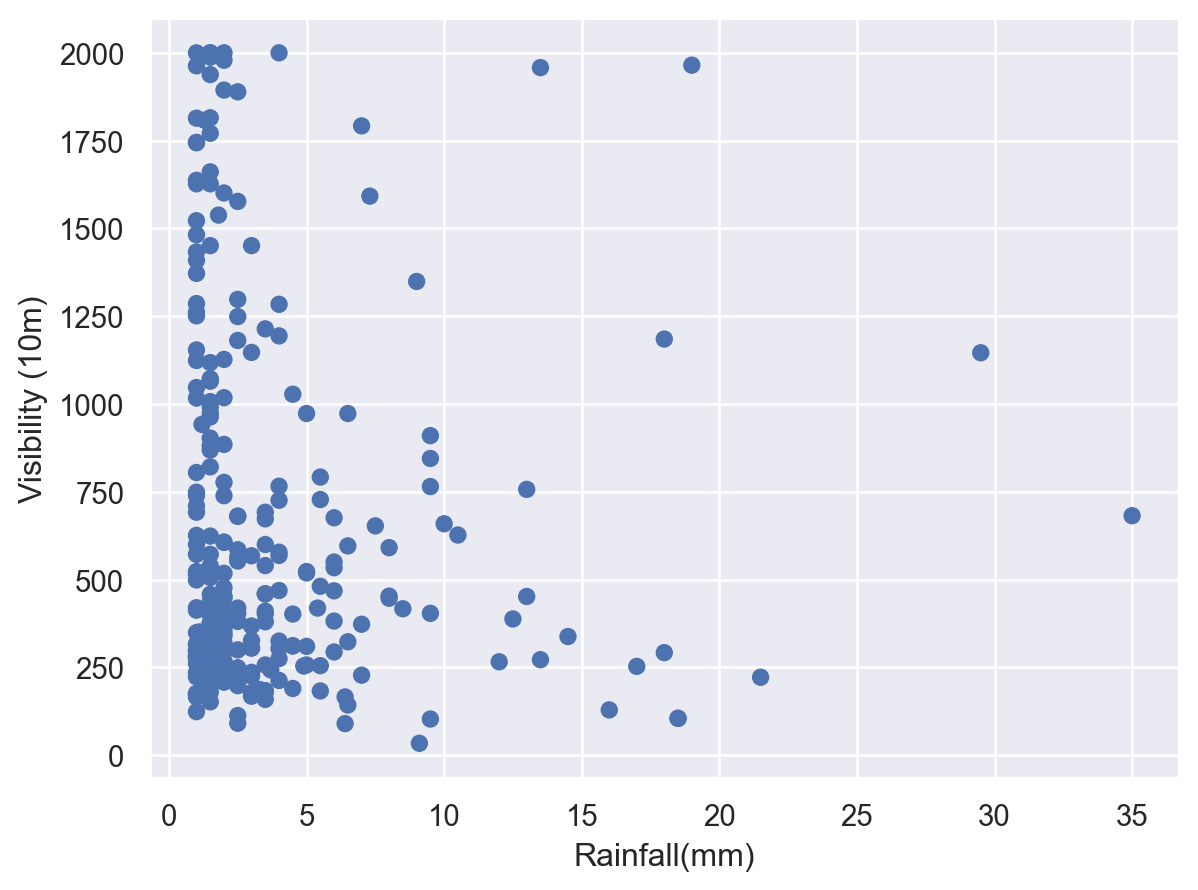

In [79]:
#비도 안오는 날이 많으므로 1mm이상 온 날로 확인
#그래프로 봤을 땐 큰 관련이 없어보임
df_rain = df[df['Rainfall(mm)'] >=1]
(
    so.Plot(df_rain,x='Rainfall(mm)',y='Visibility (10m)')
    .add(so.Dot())
)


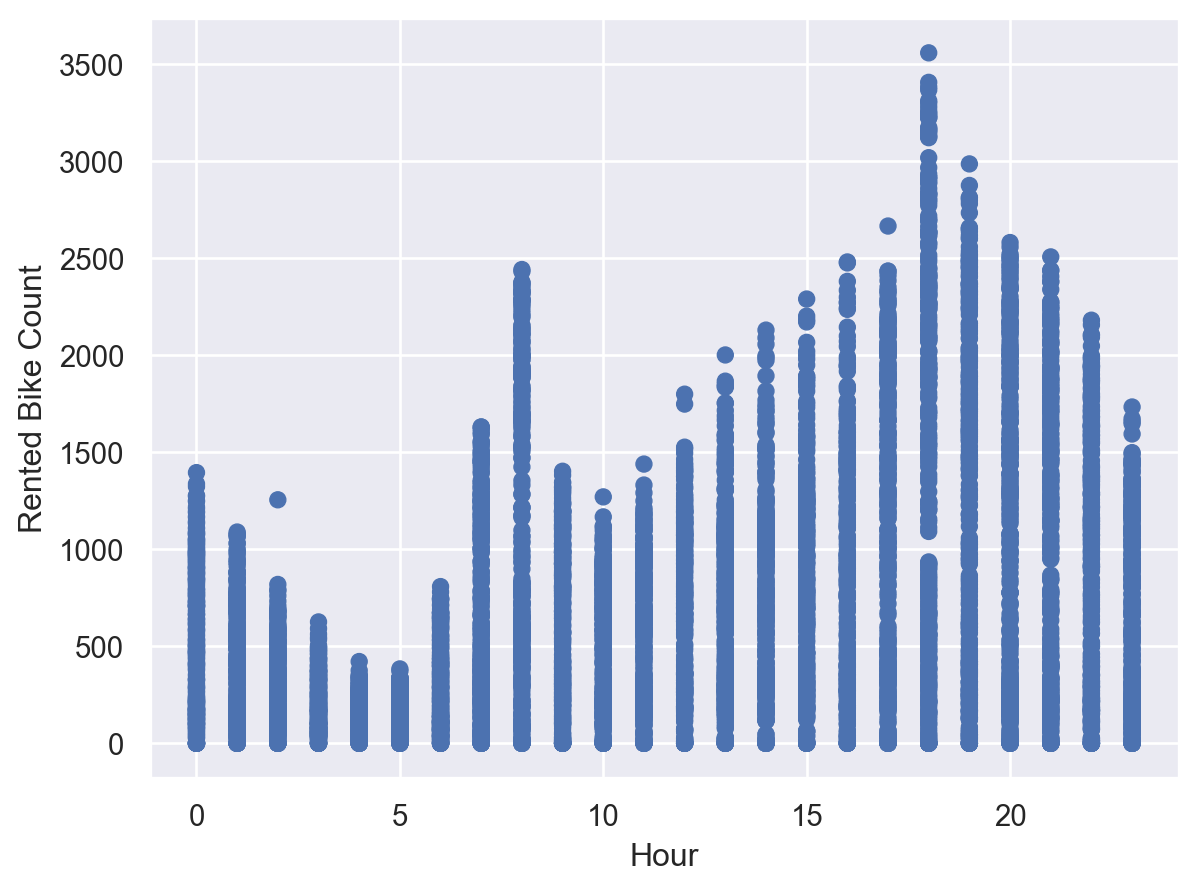

In [80]:
# 시간별 자전거 따릉이 이용확인
# 05시까지 감소 05시에서 18시정도 까지 상승 18시 이후로 감소 
(
    so.Plot(df,x='Hour',y='Rented Bike Count')
    .add(so.Dot())
)

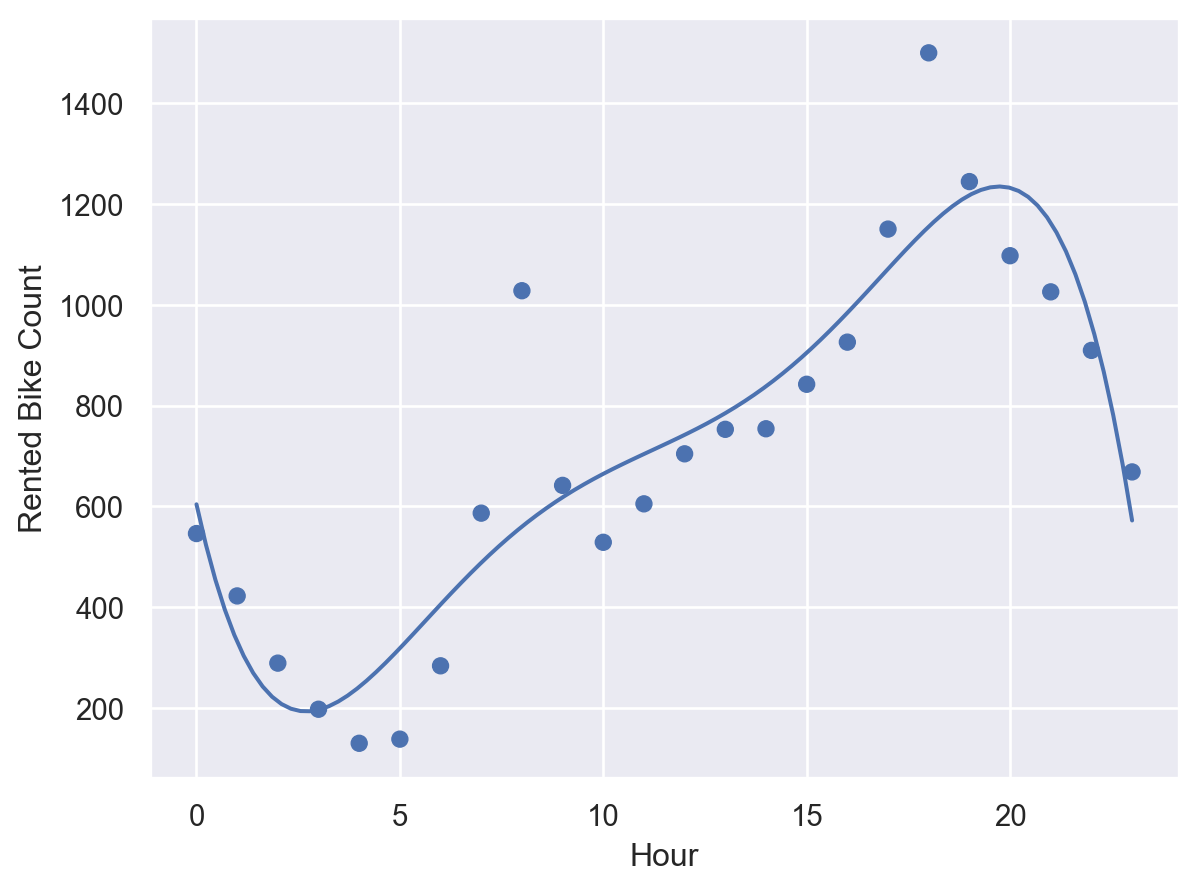

In [81]:

df1 = df.groupby("Hour")["Rented Bike Count"].mean().reset_index()
(
    so.Plot(df1,x='Hour',y='Rented Bike Count')
    .add(so.Dot())
    .add(so.Line(),so.PolyFit(5))
)


In [82]:
#데이터를 계절별로 분리
df_Win = df[df['Seasons'] == 'Winter']
df_Spr = df[df['Seasons'] == 'Spring']
df_Sum = df[df['Seasons'] == 'Summer']
df_Aut = df[df['Seasons'] == 'Autumn']

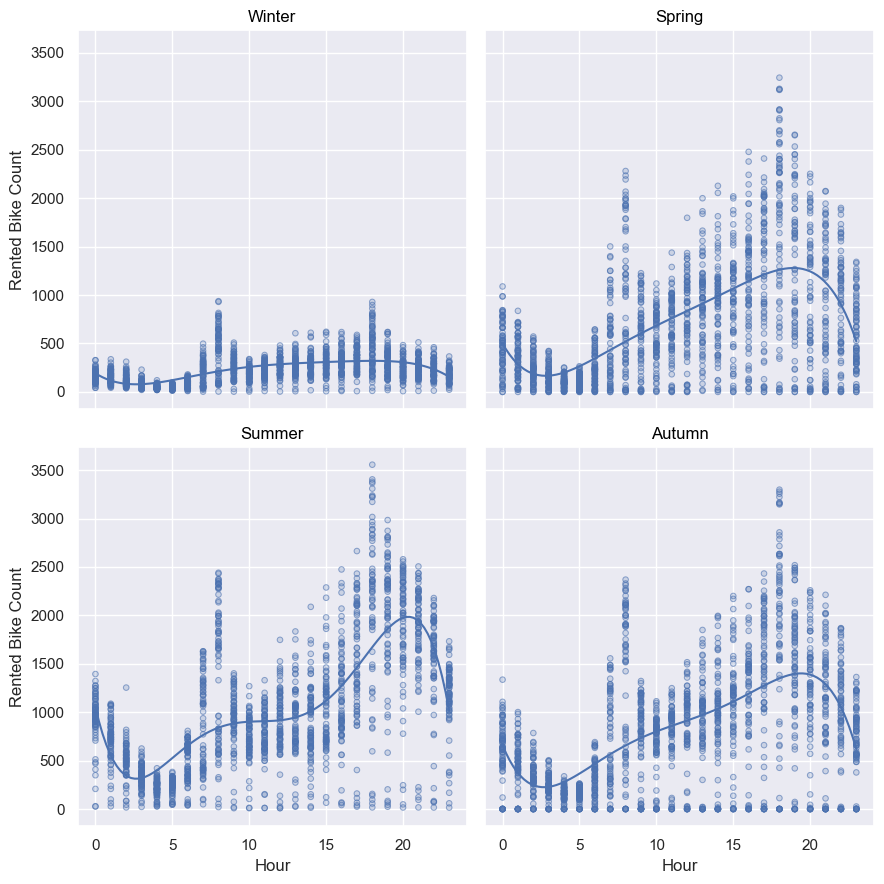

In [83]:
#계절별로 시간대 대여량 확인
#4개의 계절별로 차이는 있지만 모두 08시와 18시에 상대적으로 큰 대여량을 보임(08시는 출근시간/18시는 퇴근시간으로 추측)
df2= (
    so.Plot(df, x='Hour', y='Rented Bike Count')
    .facet("Seasons",wrap = 2)
    .add(so.Dots(alpha = 0.6))
    .add(so.Line(),so.PolyFit(5))
    .layout(size=(9, 9))
)

df2.show()

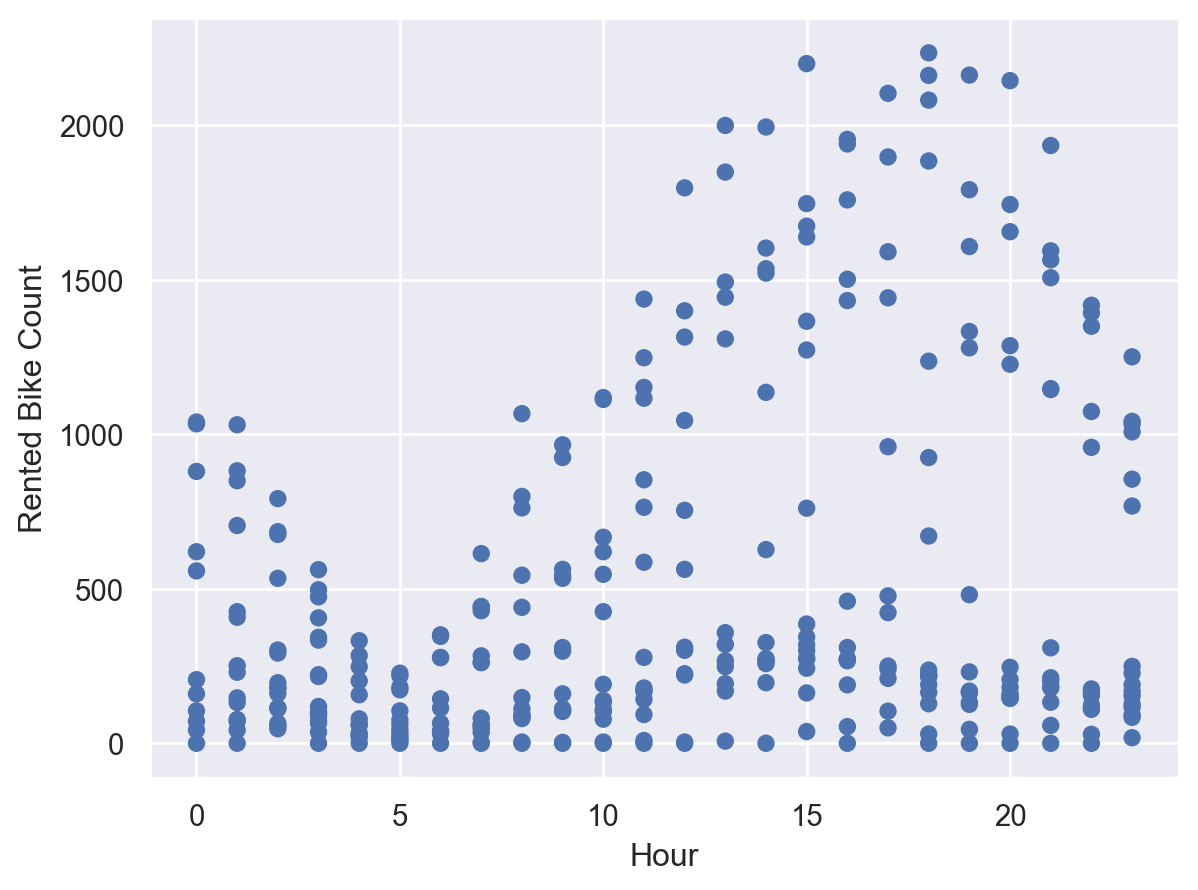

In [84]:
#공휴일인 날의 시간대별 대여량 확인
#전체 데이터를 봤을때보다 고르게 분포되있는것 같다
Holiday_df = df[df['Holiday']== 'Holiday']
(
    so.Plot(Holiday_df,x='Hour',y='Rented Bike Count')
    .add(so.Dot())
)

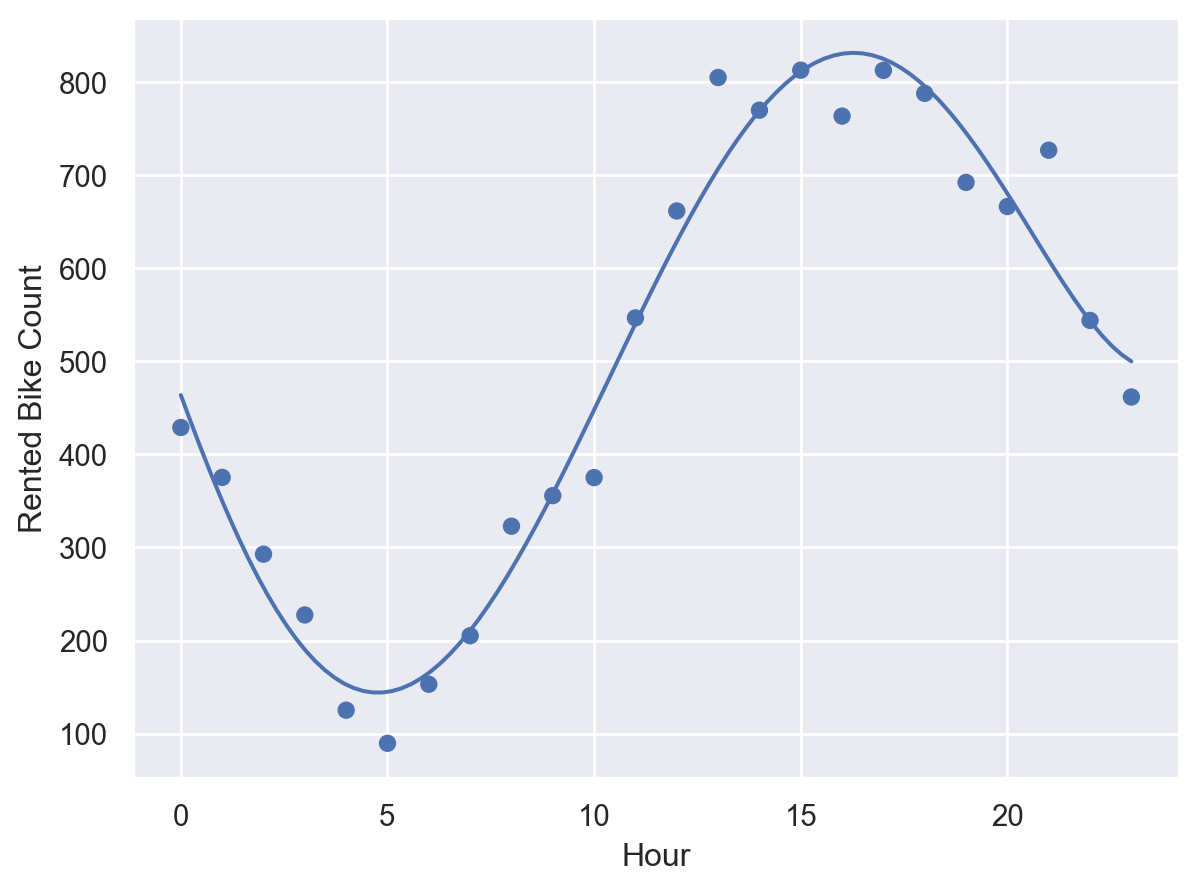

In [85]:
#공휴일인 날은 출퇴근을 안하므로 08시와 18시에 두드러진 값을 안보이는 것으로 확인됨
df4 = Holiday_df.groupby("Hour")["Rented Bike Count"].mean().reset_index()
(
    so.Plot(df4,x='Hour',y='Rented Bike Count')
    .add(so.Dot())
    .add(so.Line(),so.PolyFit(5))
)


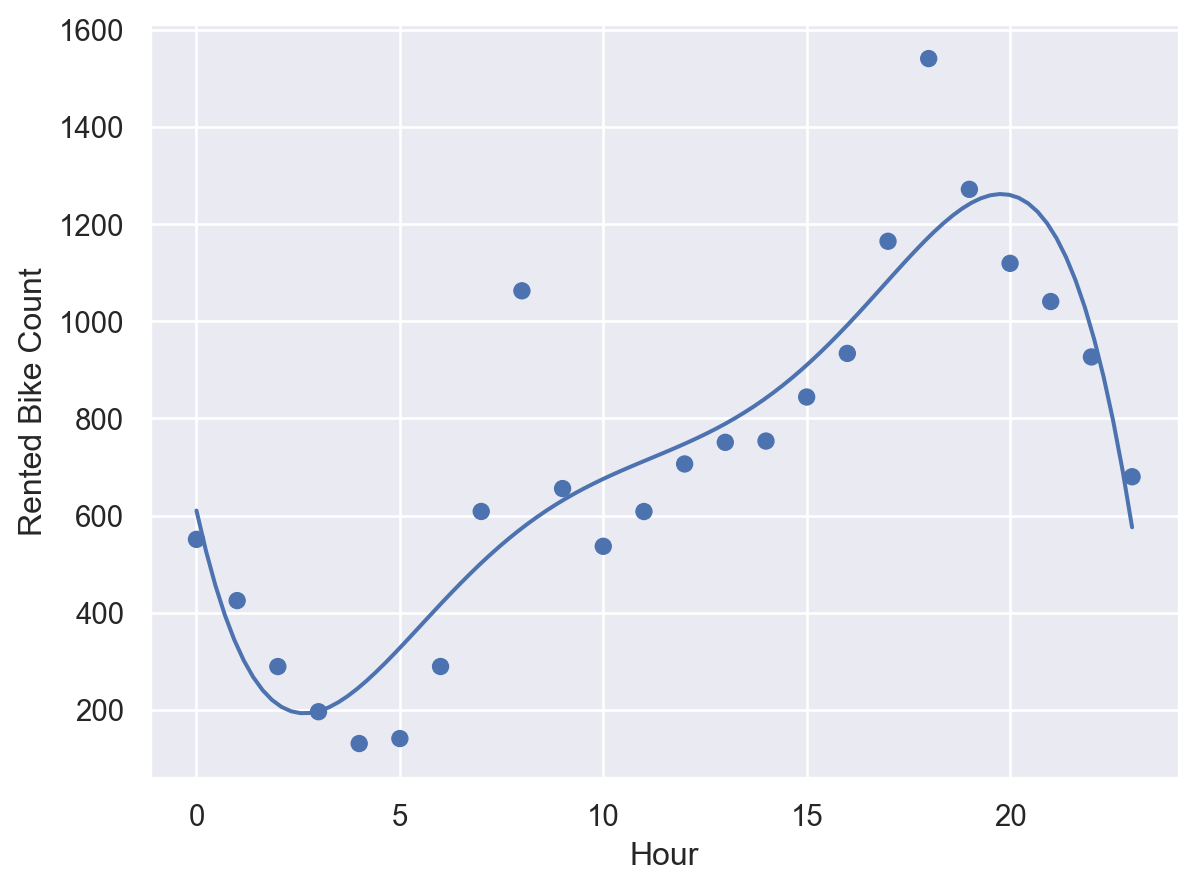

In [86]:
#공휴일이 아닌 날은 08시와 18시에 두드러진 값을 보임
df_NoHol = df[df['Holiday']== 'No Holiday']
df5 = df_NoHol.groupby("Hour")["Rented Bike Count"].mean().reset_index()
(
    so.Plot(df5,x='Hour',y='Rented Bike Count')
    .add(so.Dot())
    .add(so.Line(),so.PolyFit(5))
)


출퇴근 시간대이 따릉이 영향을 많이 주는 것으로 보임